# Project-1 Mushroom

In [126]:
#Let's import necessary Libraries

#Data Analysis and Data Wrangling
import pandas as pd
import numpy as np

#Data Visulaziation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

print("Successfully imported Libraries")

Successfully imported Libraries


In [127]:
#Let's load Mushroom data set
mushroom=pd.read_csv('mushroom.csv')

In [128]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


#### "class" attribute will be the label for our project where p represents the poisonous mushrooms and e represents the edible mushrooms. Now let's take a look at the number of entries and see if there are any missing data:

In [129]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [130]:
# iterate over each attribute and print values count for it
for key, value in mushroom.iteritems():
    print(mushroom[key].value_counts(), "\n")

e    4208
p    3916
Name: class, dtype: int64 

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64 

y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64 

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64 

f    4748
t    3376
Name: bruises, dtype: int64 

n    3528
f    2160
y     576
s     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64 

f    7914
a     210
Name: gill-attachment, dtype: int64 

c    6812
w    1312
Name: gill-spacing, dtype: int64 

b    5612
n    2512
Name: gill-size, dtype: int64 

b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64 

t    4608
e    3516
Name: stalk-shape, dtype: int64 

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64 

s    5176
k    2372
f     552
y 

In [131]:
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


#### We notice that the column veil-type has only 1 unique value, i.e. all 8124 mushroom instances have the same veil-type.

So it becomes an irrelevant feature, thus we proceed to remove it from our data.

In [132]:
mushroom.drop(['veil-type'], axis=1, inplace=True)

In [133]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [134]:
#Let's convert catagotical data to numeric data
from sklearn.preprocessing import LabelEncoder
mappings=list()
le=LabelEncoder()
for column in range(len(mushroom.columns)):
    mushroom[mushroom.columns[column]]=le.fit_transform(mushroom[mushroom.columns[column]])
    mappings_dict={index: label for index, label in enumerate(le.classes_)}
    mappings.append(mappings_dict)

In [135]:
mappings

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y'},
 {0: 'd

In [136]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


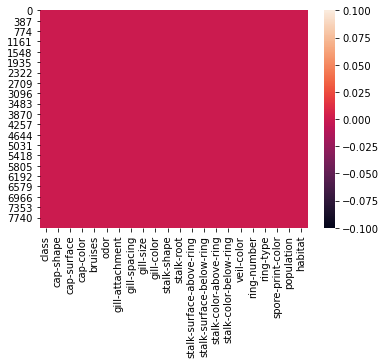

In [137]:
sns.heatmap(mushroom.isnull())
plt.show()

In [138]:
#let's check the correlation matrix
mushroom.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


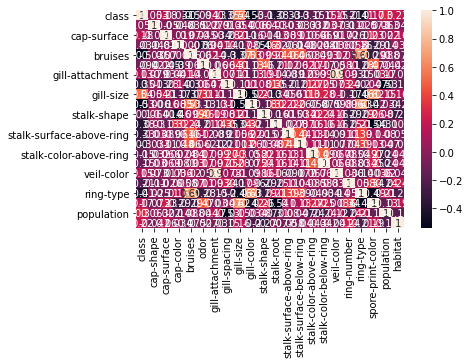

In [139]:
cor=mushroom.corr()
sns.heatmap(cor,annot=True)

In [140]:
#sns.pairplot(mushroom)

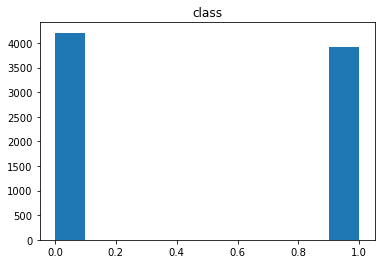

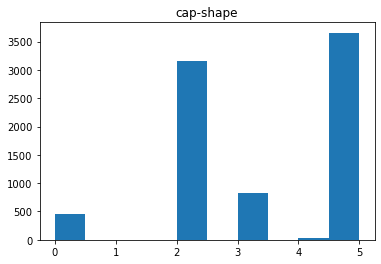

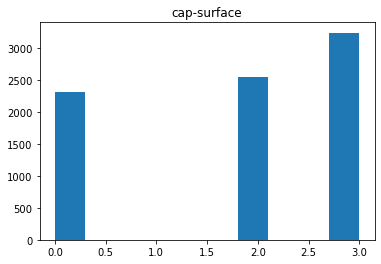

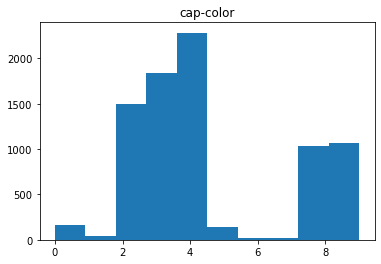

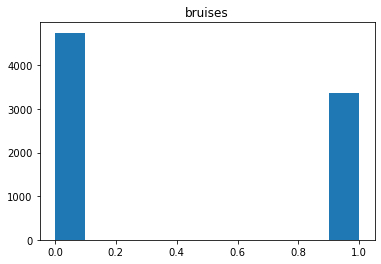

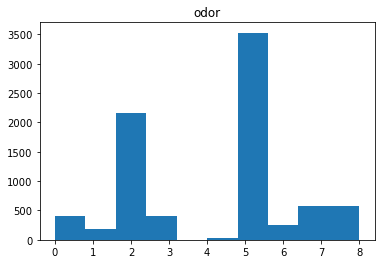

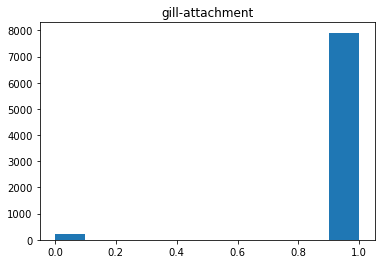

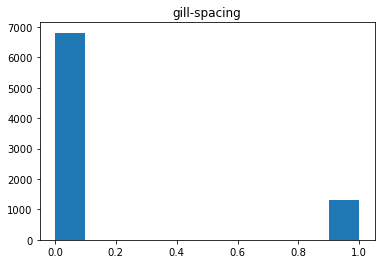

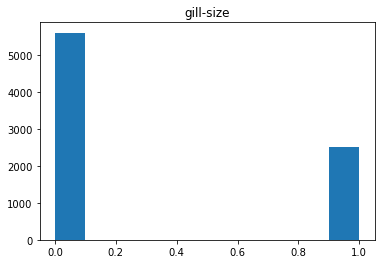

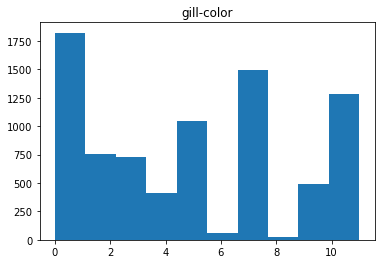

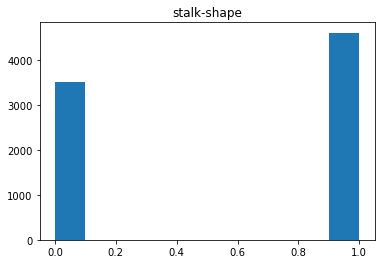

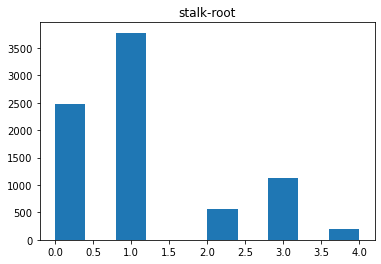

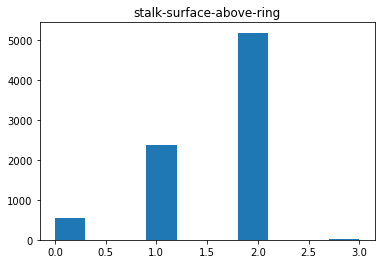

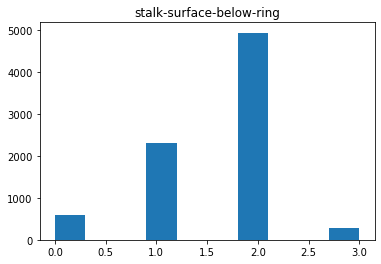

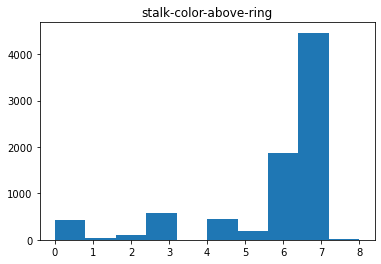

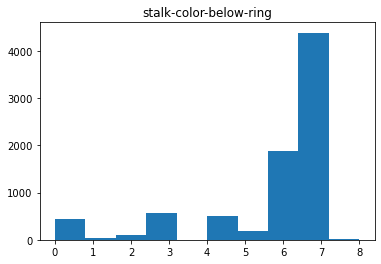

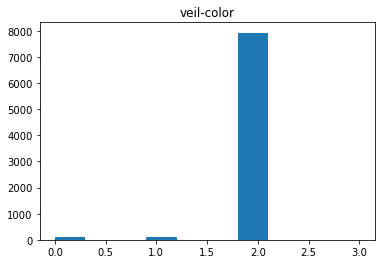

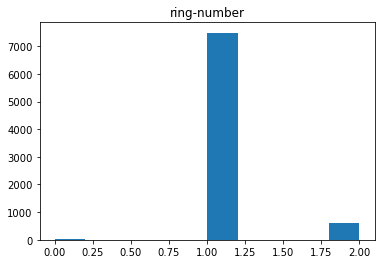

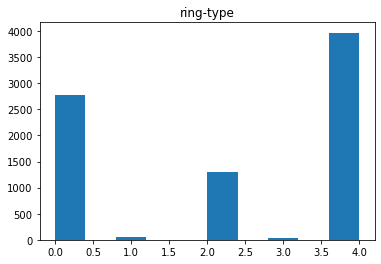

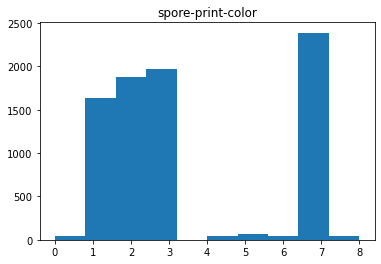

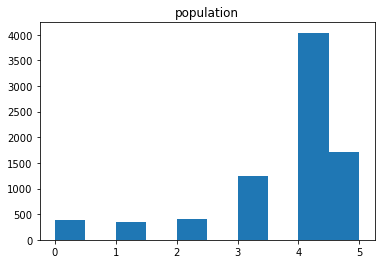

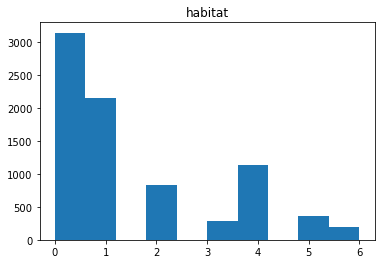

In [141]:
# Let's check the distribution of all numeric variables
for i in mushroom.columns:
    plt.hist(mushroom[i])
    plt.title(i)
    plt.show()

In [142]:
#Let's standardize our data

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)

In [143]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-0.216992,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.683778,0.586385,-0.429288,-0.416681,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8120,1.029712,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.683778,0.586385,-0.429288,-0.416681,-8.100146,-0.256132,0.948081,-1.509643,0.284330,0.285710
8121,-0.840343,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,0.053477,-1.144806,...,0.683778,0.586385,-0.429288,-0.416681,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8122,-0.216992,0.953270,-0.198250,-0.843230,1.832689,0.162896,-0.438864,1.494683,-1.358896,0.873511,...,0.683778,-0.893053,0.622441,0.631991,0.142037,-0.256132,-1.272216,1.428426,0.284330,0.285710


In [144]:
#Let's split the data into test and training

y=mushroom['class']
x=mushroom.drop('class',axis=1)

In [145]:
#Let's split the data into test and training
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [146]:
x_train.shape

(6093, 21)

In [147]:
y.shape

(8124,)

In [148]:
# Let's create a funtion with machine learing  model

def models(x_train, y_train):
    # use logistic Regression
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(random_state=0)
    log.fit(x_train,y_train)

    #use KNEighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
    knn.fit(x_train,y_train)

    #use SVC(Linear Kernel)
    from sklearn.svm import SVC
    svc_lin=SVC(kernel='linear',random_state=0)
    svc_lin.fit(x_train,y_train)

    #use SVC(RBF Kernel)
    from sklearn.svm import SVC
    svc_rbf=SVC(kernel='rbf',random_state=0)
    svc_rbf.fit(x_train,y_train)

    #use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss=GaussianNB()
    gauss.fit(x_train,y_train)

    #use Decission Tree
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(x_train,y_train)

    #use RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    forest.fit(x_train,y_train)
    
    #Print the training accuracy for each model
    print('[0]Logistic Regression Training Accuracy',log.score(x_train,y_train))
    print('[1]K Neighbor Training Accuracy',knn.score(x_train,y_train))
    print('[2]SVC Linear Training Accuracy',svc_lin.score(x_train,y_train))
    print('[3]SVC RBF Training Accuracy',svc_rbf.score(x_train,y_train))
    print('[4]Gaussian NB Training Accuracy',gauss.score(x_train,y_train))
    print('[5]Decission Tree Training Accuracy',tree.score(x_train,y_train))
    print('[6]Random Forest Training Accuracy',forest.score(x_train,y_train))
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest


In [149]:
#Let's get and train all of the model

model=models(x_train,y_train)

[0]Logistic Regression Training Accuracy 0.9514196619071065
[1]K Neighbor Training Accuracy 0.9986870178893813
[2]SVC Linear Training Accuracy 0.971770884621697
[3]SVC RBF Training Accuracy 0.9909732479894962
[4]Gaussian NB Training Accuracy 0.9223699327096668
[5]Decission Tree Training Accuracy 1.0
[6]Random Forest Training Accuracy 1.0


In [150]:
# Show the confusion matrix and accuracy for all the models on the test data

from sklearn.metrics import confusion_matrix

for i in range(len(model)):
    cm=confusion_matrix(y_test,model[i].predict(x_test))
    
    # Extract TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(y_test,model[i].predict(x_test)).ravel()
    
    test_score=(TP+TN) / (TP+TN+FN+FP)
    
    print(cm)
    print('Model [{}] Testing Accuracy = "{}"'.format(i,test_score))
    print()
    
    

[[1018   43]
 [  58  912]]
Model [0] Testing Accuracy = "0.9502708025603152"

[[1054    7]
 [   1  969]]
Model [1] Testing Accuracy = "0.9960610536681438"

[[1047   14]
 [  44  926]]
Model [2] Testing Accuracy = "0.9714426390940424"

[[1059    2]
 [  15  955]]
Model [3] Testing Accuracy = "0.9916297390448056"

[[966  95]
 [ 79 891]]
Model [4] Testing Accuracy = "0.914327917282127"

[[1061    0]
 [   0  970]]
Model [5] Testing Accuracy = "1.0"

[[1061    0]
 [   0  970]]
Model [6] Testing Accuracy = "1.0"



In [151]:
#lets find pout the random state values with whihc our linear model learns maximum

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,800):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    log=linear_model.LogisticRegression()
    log.fit(x_train,y_train)
    y_pred=log.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state

print("Max r2 score corresponding to ",final_r_state,"is",max_r_score)

Max r2 score corresponding to  417 is 0.8569094878498316


In [152]:
# Let's create a funtion with machine learing  model

def models(x_train, y_train):
    # use logistic Regression
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(random_state=417)
    log.fit(x_train,y_train)

    #use KNEighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
    knn.fit(x_train,y_train)

    #use SVC(Linear Kernel)
    from sklearn.svm import SVC
    svc_lin=SVC(kernel='linear',random_state=417)
    svc_lin.fit(x_train,y_train)

    #use SVC(RBF Kernel)
    from sklearn.svm import SVC
    svc_rbf=SVC(kernel='rbf',random_state=417)
    svc_rbf.fit(x_train,y_train)

    #use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss=GaussianNB()
    gauss.fit(x_train,y_train)

    #use Decission Tree
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion='entropy',random_state=417)
    tree.fit(x_train,y_train)

    #use RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=417)
    forest.fit(x_train,y_train)
    
    #Print the training accuracy for each model
    print('[0]Logistic Regression Training Accuracy',log.score(x_train,y_train))
    print('[1]K Neighbor Training Accuracy',knn.score(x_train,y_train))
    print('[2]SVC Linear Training Accuracy',svc_lin.score(x_train,y_train))
    print('[3]SVC RBF Training Accuracy',svc_rbf.score(x_train,y_train))
    print('[4]Gaussian NB Training Accuracy',gauss.score(x_train,y_train))
    print('[5]Decission Tree Training Accuracy',tree.score(x_train,y_train))
    print('[6]Random Forest Training Accuracy',forest.score(x_train,y_train))
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest


In [153]:
#Let's get and train all of the model

model=models(x_train,y_train)

[0]Logistic Regression Training Accuracy 0.9519926142483459
[1]K Neighbor Training Accuracy 0.9995383905216187
[2]SVC Linear Training Accuracy 0.9627635020772427
[3]SVC RBF Training Accuracy 0.9907678104323742
[4]Gaussian NB Training Accuracy 0.9247576550238499
[5]Decission Tree Training Accuracy 1.0
[6]Random Forest Training Accuracy 1.0


In [154]:
# Show the confusion matrix and accuracy for all the models on the test data

from sklearn.metrics import confusion_matrix

for i in range(len(model)):
    cm=confusion_matrix(y_test,model[i].predict(x_test))
    
    # Extract TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(y_test,model[i].predict(x_test)).ravel()
    
    test_score=(TP+TN) / (TP+TN+FN+FP)
    
    print(cm)
    print('Model [{}] Testing Accuracy = "{}"'.format(i,test_score))
    print()
    
    

[[774  44]
 [ 45 762]]
Model [0] Testing Accuracy = "0.9452307692307692"

[[815   3]
 [  0 807]]
Model [1] Testing Accuracy = "0.9981538461538462"

[[780  38]
 [ 38 769]]
Model [2] Testing Accuracy = "0.9532307692307692"

[[816   2]
 [ 17 790]]
Model [3] Testing Accuracy = "0.9883076923076923"

[[758  60]
 [ 67 740]]
Model [4] Testing Accuracy = "0.9218461538461539"

[[818   0]
 [  0 807]]
Model [5] Testing Accuracy = "1.0"

[[818   0]
 [  0 807]]
Model [6] Testing Accuracy = "1.0"



In [155]:
import joblib

#save the model as a pickle in a file
joblib.dump(models,'mushroom.pkl')

['mushroom.pkl']